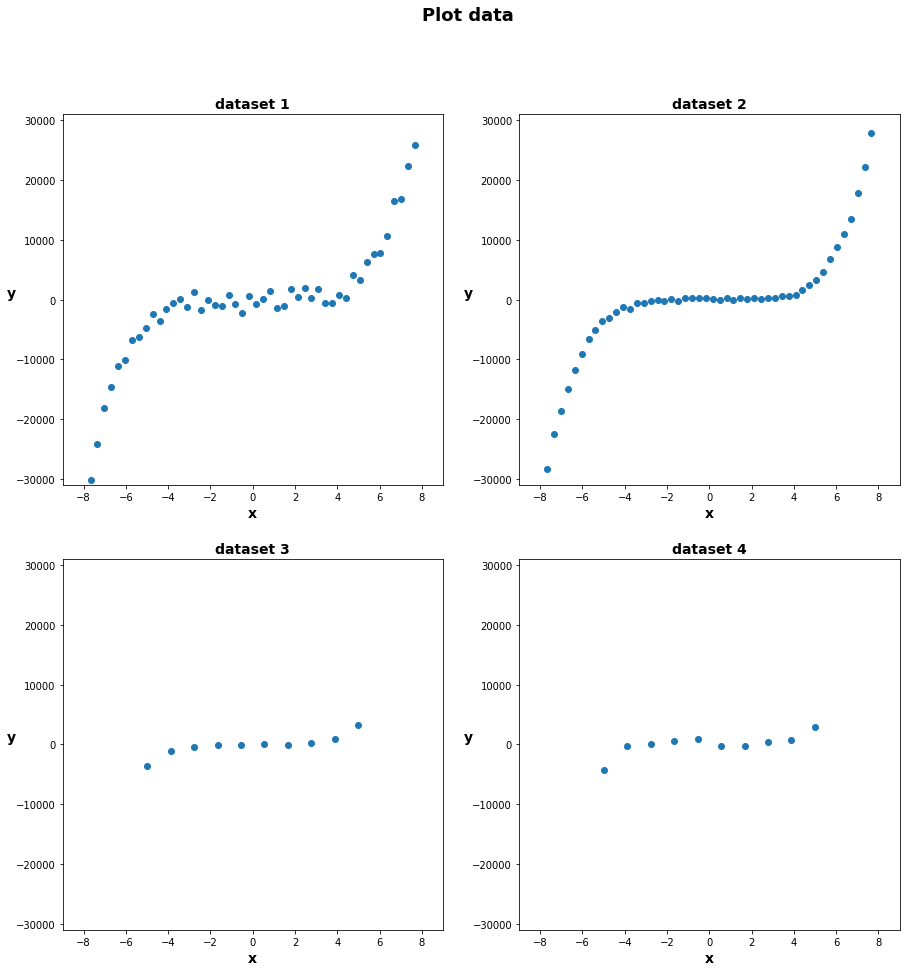

In [174]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import mean_squared_error as mse
from pandas import DataFrame

# Read data
x1 = np.loadtxt('data/1/x.txt', dtype=str).astype('float32')
y1 = np.loadtxt('data/1/y.txt', dtype=str).astype('float32')
x2 = np.loadtxt('data/2/x.txt', dtype=str).astype('float32')
y2 = np.loadtxt('data/2/y.txt', dtype=str).astype('float32')
x3 = np.loadtxt('data/3/x.txt', dtype=str).astype('float32')
y3 = np.loadtxt('data/3/y.txt', dtype=str).astype('float32')
x4 = np.loadtxt('data/4/x.txt', dtype=str).astype('float32')
y4 = np.loadtxt('data/4/y.txt', dtype=str).astype('float32')

# Plot data
fig = plt.figure(figsize=(15, 15))
plt.suptitle('Plot data', fontsize=18, fontweight='bold')
for (x, y, i) in zip((x1, x2, x3, x4), (y1, y2, y3, y4), (1, 2, 3, 4)):
    ax = plt.subplot(2, 2, i)
    ax.set_xlim(-9, 9)
    ax.set_ylim(-31000, 31000)
    plt.xlabel('x', fontsize=14, fontweight='bold')
    plt.ylabel('y', fontsize=14, fontweight='bold', rotation='horizontal')
    plt.title('dataset ' + str(i), fontsize=14, fontweight='bold')
    plt.scatter(x, y)
plt.show()

## Two-fold cross validation

In [ ]:
RMSE = np.zeros((4, 11), dtype='float32')
kf = KFold(n_splits=2, shuffle=True)
for x, y, i in zip((x1, x2, x3, x4), (y1, y2, y3, y4), range(4)):
    N = len(x)
    for degree in range(11):
        rmse = 0
        for train_index, test_index in kf.split(x, y):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            p = np.polyfit(x_train, y_train, degree)
            y_predict = np.polyval(p, x_test)
            rmse += mse(y_test, y_predict, squared=False)
        rmse /= kf.get_n_splits()
        RMSE[i][degree] = rmse

In [176]:
df = DataFrame({'Dataset 1': RMSE[0], 'Dataset 2': RMSE[1], 'Dataset 3': RMSE[2], 'Dataset 4': RMSE[3]})
df.index.name = 'Degree'
df['Average'] = df.mean(numeric_only=True, axis=1)
df.loc['Average'] = df.mean()
df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Average
Degree,,,,,
0,11721.912109,11647.960938,1797.787109,1454.203735,6655.465820
1,6524.114258,6751.796387,1475.126709,1930.629883,4170.416992
2,7698.190430,8363.964844,2616.763672,7593.010742,6567.982422
3,1750.310791,1931.994141,434.981384,936.916016,1263.550537
4,2520.456787,2209.730225,696.038086,2114.192383,1885.104370
5,1361.136230,266.236603,334.795807,3372.102295,1333.567749
6,2052.627197,251.293213,1975.891357,2375.287109,1663.774658
7,2036.260986,771.543457,277.840332,6412.386719,2374.507812
8,1291.442139,417.587891,1479.280640,3994.055176,1795.591431


## Five-fold cross validation

In [ ]:
RMSE = np.zeros((4, 11), dtype='float32')
kf = KFold(n_splits=5, shuffle=True)
for x, y, i in zip((x1, x2, x3, x4), (y1, y2, y3, y4), range(4)):
    N = len(x)
    for degree in range(11):
        rmse = 0
        for train_index, test_index in kf.split(x, y):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            p = np.polyfit(x_train, y_train, degree)
            y_predict = np.polyval(p, x_test)
            rmse += mse(y_test, y_predict, squared=False)
        rmse /= kf.get_n_splits()
        RMSE[i][degree] = rmse

In [184]:
df = DataFrame({'Dataset 1': RMSE[0], 'Dataset 2': RMSE[1], 'Dataset 3': RMSE[2], 'Dataset 4': RMSE[3]})
df.index.name = 'Degree'
df['Average'] = df.mean(numeric_only=True, axis=1)
df.loc['Average'] = df.mean()
df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Average
Degree,,,,,
0,11940.751953,11612.968750,1388.654297,1473.880127,6604.063965
1,6696.025879,6902.355469,1064.182861,1342.631104,4001.298584
2,6952.019043,6974.694824,1440.032715,2142.619385,4377.341309
3,1892.370605,1513.091309,339.744751,951.427002,1174.158447
4,1961.003052,1917.273926,693.032471,1129.110474,1425.104980
5,1208.212402,240.598907,135.336166,1635.526123,804.918396
6,1241.008301,265.959167,422.423523,3826.114502,1438.876465
7,1271.533447,299.024933,3581.949463,7005.016113,3039.380859
8,1382.776489,282.774750,2883.453369,4635.629883,2296.158691


## Ten-fold cross validation

In [ ]:
RMSE = np.zeros((4, 11), dtype='float32')
kf = KFold(n_splits=10, shuffle=True)
for x, y, i in zip((x1, x2, x3, x4), (y1, y2, y3, y4), range(4)):
    N = len(x)
    for degree in range(11):
        rmse = 0
        for train_index, test_index in kf.split(x, y):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            p = np.polyfit(x_train, y_train, degree)
            y_predict = np.polyval(p, x_test)
            rmse += mse(y_test, y_predict, squared=False)
        rmse /= kf.get_n_splits()
        RMSE[i][degree] = rmse

In [180]:
df = DataFrame({'Dataset 1': RMSE[0], 'Dataset 2': RMSE[1], 'Dataset 3': RMSE[2], 'Dataset 4': RMSE[3]})
df.index.name = 'Degree'
df['Average'] = df.mean(numeric_only=True, axis=1)
df.loc['Average'] = df.mean()
df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Average
Degree,,,,,
0,10765.721680,10389.355469,1062.031372,1174.162109,5847.817871
1,6640.215332,6535.800781,992.633179,1403.281250,3892.982422
2,6434.693848,6800.589844,1301.695068,1831.322510,4092.075195
3,1815.192261,1603.523071,313.689850,636.117004,1092.130615
4,1916.570923,1656.294678,585.746338,872.367737,1257.744995
5,1109.411255,241.462402,186.554611,904.396545,610.456177
6,1200.482178,241.866272,631.067627,3184.454102,1314.467529
7,1230.949585,234.103607,472.806000,1832.823608,942.670715
8,1419.555054,277.849091,6803.139648,15820.783203,6080.332031


## N-fold cross validation

In [ ]:
RMSE = np.zeros((4, 11), dtype='float32')
loo = LeaveOneOut()
for x, y, i in zip((x1, x2, x3, x4), (y1, y2, y3, y4), range(4)):
    N = len(x)
    for degree in range(11):
        rmse = 0
        for train_index, test_index in loo.split(x, y):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            p = np.polyfit(x_train, y_train, degree)
            y_predict = np.polyval(p, x_test)
            rmse += mse(y_test, y_predict, squared=False)
        rmse /= loo.get_n_splits(x)
        RMSE[i][degree] = rmse

In [182]:
df = DataFrame({'Dataset 1': RMSE[0], 'Dataset 2': RMSE[1], 'Dataset 3': RMSE[2], 'Dataset 4': RMSE[3]})
df.index.name = 'Degree'
df['Average'] = df.mean(numeric_only=True, axis=1)
df.loc['Average'] = df.mean()
df

,Dataset 1,Dataset 2,Dataset 3,Dataset 4,Average
Degree,,,,,
0,7067.750000,6654.768555,1062.031372,1174.162109,3989.677979
1,5445.086914,5526.864258,992.633179,1403.281250,3341.966309
2,5629.295410,5709.875000,1301.695068,1831.322510,3618.046875
3,1519.268799,1348.348022,313.689850,636.117004,954.355896
4,1566.301880,1401.987061,585.746338,872.367737,1106.600830
5,1041.246826,199.040558,186.554611,904.396545,582.809631
6,1086.609375,198.792130,631.067627,3184.454102,1275.230835
7,1113.882324,204.420334,472.806000,1832.823608,905.983032
8,1183.808594,221.279816,6803.139648,15820.783203,6007.252930
